In [3]:
!pip install git+https://github.com/zilleanai/zillean_client

  Cloning https://github.com/zilleanai/zillean_client to /tmp/pip-req-build-sn4xh7li
  Running command git clone -q https://github.com/zilleanai/zillean_client /tmp/pip-req-build-sn4xh7li
     |████████████████████████████████| 450kB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 4.1MB/s eta 0:00:011
  Stored in directory: /tmp/pip-ephem-wheel-cache-1fjs9fbv/wheels/15/ce/57/57c026d4f3ccecad59478ab6cd5088dc9c173b3a2d8f3da85e
Successfully built zillean-client


In [82]:
import numpy as np
import os
domain = 'backend:5000'
api_root = 'http://'+domain+'/api/v1/'

In [83]:
from zillean_client import load
load(api_root)
from zillean_client.tag import tag as tagapi
tag_api = tagapi(project={'api_root': api_root, 'name': 'trains'})
print('tags: ', tag_api.list())

zillean_client
importing module: project
importing module: file
importing module: tag
importing module: image
importing module: labeling_mask
importing module: predict
tags:  ['file']


In [84]:
from zillean_client.file import file as fileapi
file_api = fileapi(project={'api_root': api_root, 'name': 'trains'})
print('dirs:', file_api.dirs())

dirs: ['.git', 'trains', 'data', 'data_masks']


In [85]:
for d in file_api.dirs():
    print(d, file_api.files(path='/'+d))

.git ['description', 'HEAD', 'config']
trains []
data ['out_0140.jpg', 'out_0141.jpg', 'out_0143.jpg', 'out_0142.jpg', 'out_0145.jpg', 'out_0144.jpg', 'out_0146.jpg', 'out_0147.jpg', 'out_0149.jpg', 'out_0148.jpg', 'out_0150.jpg', 'out_0151.jpg', 'out_0152.jpg', 'out_0153.jpg', 'out_0155.jpg', 'out_0154.jpg', 'out_0156.jpg', 'out_0157.jpg', 'out_0159.jpg', 'out_0158.jpg', 'out_0160.jpg', 'out_0161.jpg', 'out_0163.jpg', 'out_0162.jpg', 'out_0164.jpg', 'out_0165.jpg', 'out_0167.jpg', 'out_0166.jpg', 'out_0169.jpg', 'out_0168.jpg', 'out_0170.jpg']
data_masks ['out_0140_mask.png', 'out_0141_mask.png']


In [86]:
for f in file_api.files(path='/data'):
    print(f)

out_0140.jpg
out_0141.jpg
out_0143.jpg
out_0142.jpg
out_0145.jpg
out_0144.jpg
out_0146.jpg
out_0147.jpg
out_0149.jpg
out_0148.jpg
out_0150.jpg
out_0151.jpg
out_0152.jpg
out_0153.jpg
out_0155.jpg
out_0154.jpg
out_0156.jpg
out_0157.jpg
out_0159.jpg
out_0158.jpg
out_0160.jpg
out_0161.jpg
out_0163.jpg
out_0162.jpg
out_0164.jpg
out_0165.jpg
out_0167.jpg
out_0166.jpg
out_0169.jpg
out_0168.jpg
out_0170.jpg


In [87]:
from zillean_client.image import image as imageapi
image_api = imageapi(project={'api_root': api_root, 'name': 'trains'})
print('images', image_api.list(path='/data'))

images ['out_0140.jpg', 'out_0141.jpg', 'out_0143.jpg', 'out_0142.jpg', 'out_0145.jpg', 'out_0144.jpg', 'out_0146.jpg', 'out_0147.jpg', 'out_0149.jpg', 'out_0148.jpg', 'out_0150.jpg', 'out_0151.jpg', 'out_0152.jpg', 'out_0153.jpg', 'out_0155.jpg', 'out_0154.jpg', 'out_0156.jpg', 'out_0157.jpg', 'out_0159.jpg', 'out_0158.jpg', 'out_0160.jpg', 'out_0161.jpg', 'out_0163.jpg', 'out_0162.jpg', 'out_0164.jpg', 'out_0165.jpg', 'out_0167.jpg', 'out_0166.jpg', 'out_0169.jpg', 'out_0168.jpg', 'out_0170.jpg']


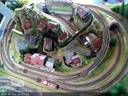

In [88]:
image_api.thumbnail('/data/out_0140.jpg')

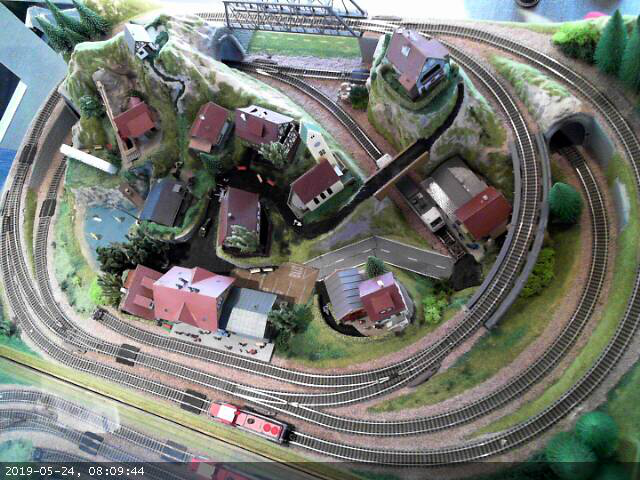

In [89]:
image_api.download('/data/out_0140.jpg')

In [90]:
from zillean_client.labeling_mask import labeling_mask as labeling_maskapi
labeling_mask_api = labeling_maskapi(project={'api_root': api_root, 'name': 'trains'})
print('images', labeling_mask_api.list(path='/data'))

images {'images': ['out_0140.jpg', 'out_0141.jpg', 'out_0143.jpg', 'out_0142.jpg', 'out_0145.jpg', 'out_0144.jpg', 'out_0146.jpg', 'out_0147.jpg', 'out_0149.jpg', 'out_0148.jpg', 'out_0150.jpg', 'out_0151.jpg', 'out_0152.jpg', 'out_0153.jpg', 'out_0155.jpg', 'out_0154.jpg', 'out_0156.jpg', 'out_0157.jpg', 'out_0159.jpg', 'out_0158.jpg', 'out_0160.jpg', 'out_0161.jpg', 'out_0163.jpg', 'out_0162.jpg', 'out_0164.jpg', 'out_0165.jpg', 'out_0167.jpg', 'out_0166.jpg', 'out_0169.jpg', 'out_0168.jpg', 'out_0170.jpg'], 'masks': ['out_0170.jpg']}


In [91]:
print('images', labeling_mask_api.tuples(path='/data'))

images [('out_0140.jpg', 'out_0140_mask.png'), ('out_0141.jpg', 'out_0141_mask.png')]


In [92]:
img_masks = labeling_mask_api.download_tuples(path='/data')

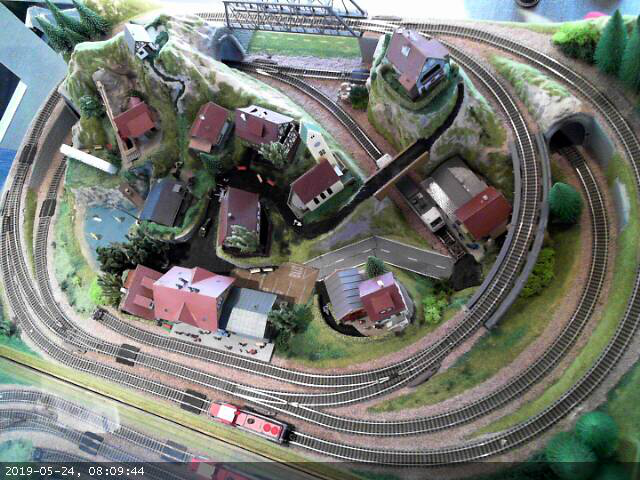

In [93]:
img_masks[0][0]

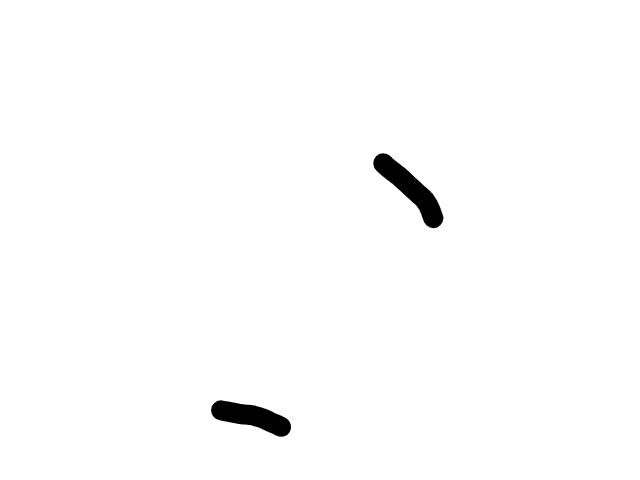

In [94]:
img_masks[0][1]

In [95]:
for (img, mask) in img_masks:
    print(np.array(img).shape, np.array(mask).shape)

(480, 640, 3) (480, 640, 4)
(480, 640, 3) (480, 640, 4)


In [96]:
from zillean_client.predict import predict as predictapi
predict_api = predictapi(project={'api_root': api_root, 'name': 'trains'})

In [97]:
from io import BytesIO
img_io = BytesIO()
img = img_masks[0][0]
img.save(img_io, 'JPEG', quality=70)
img_io.seek(0)

0

In [103]:
pred_id = predict_api.predict(img_io)

In [104]:
from PIL import Image
pred_img = Image.open(predict_api.download(pred_id))

In [105]:
img, pred_img

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7FD57C06EE80>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=640x480 at 0x7FD5A47F2E48>)

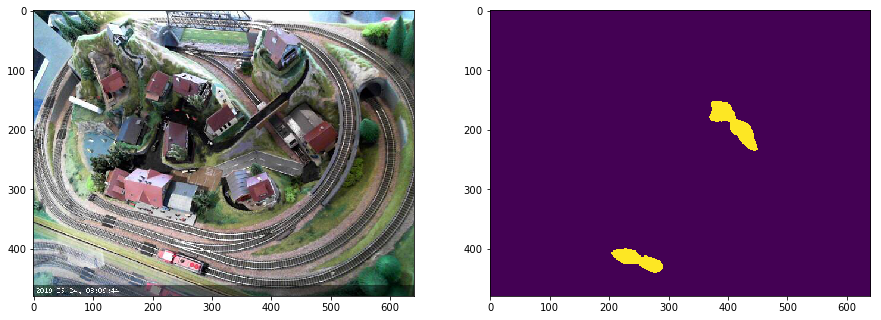

In [106]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1,2, figsize=(15, 12))
axarr[0].imshow(img)
axarr[1].imshow(pred_img)